#### Intro to ML process
* gather data -> prep data -> select model -> train -> evaluate -> tune hyperparameters -> prediction + deployment
* import data, randomize the orde
* equal ns the better - when guessing later - model assumes most data is of one kind
* split the data to train/test
* choosing a model
    * linear model typically based on two features
* training the model
    * linear model typically has y=mx+b, can have multiple ms which will adjust the weights
    * biases or yintervept
    * W/b can be updated after a training sample - iterate
* evaluate
    * test model on data that it has not seen
    * 80 training /20 test - depends on amount of data you have
* parameter tuning
    * train the data more times to fine-tune
    * learning rate - change how much you tune the data 
    * what gets tuned = hyperparameters
* prediction
    * test the model based on inputs 

#### Data Preparation
1. explore data (target variable if we have)
2. find relationships between target and other variables
3. data cleaning - missing and outliers

* check data formats
* verify the data types - nominal, ordinal, interval, ratio
* graph the data - get a sense of distribution
* verify accuracy - some require knowledge of subject area
    * some values are always positive or product codes match etc.
* identify outliers - usually delete is most common - can run analysis twice with/without
* deal with missing values - missing values could just be zeros, not always random. 
* check assumption on how data is distributed
* split to train/test - make sure they are randomized - and not sorted in some way
    * this protects from overfitting - statistical procedures just memorizes the data file rather than getting relationships among variables - will be bad on a Test file

* keep a written record of what you're up to - label the graphs. 

#### Data Exploration
* univariate - one at a time
* multivariate - more than one at a time
* using math or manually from knowledge 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('house_prices/train.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [7]:
df_train['Id'].duplicated().any()

False

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

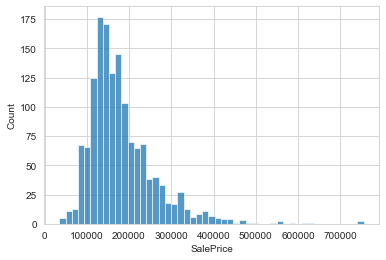

In [31]:
# descriptive statistics
df_train['SalePrice'].describe()
# histogram
sns.set_style('whitegrid')
sns.histplot(df_train['SalePrice'])

In [9]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

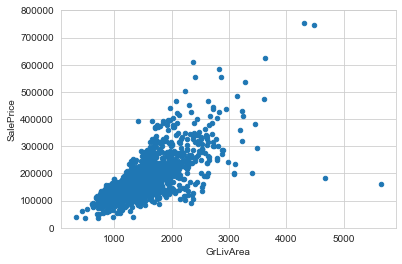

In [10]:
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

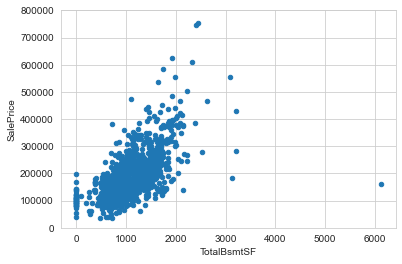

In [11]:
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

#### For Categorical Variables

(-0.5, 9.5, 0.0, 800000.0)

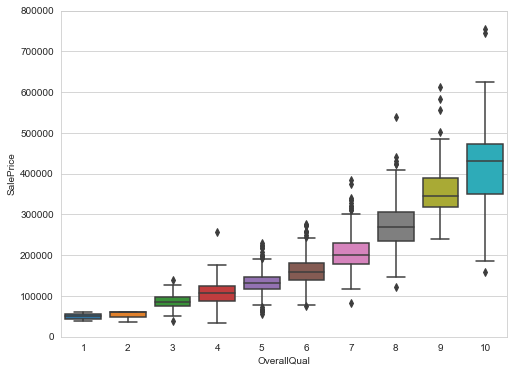

In [12]:
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


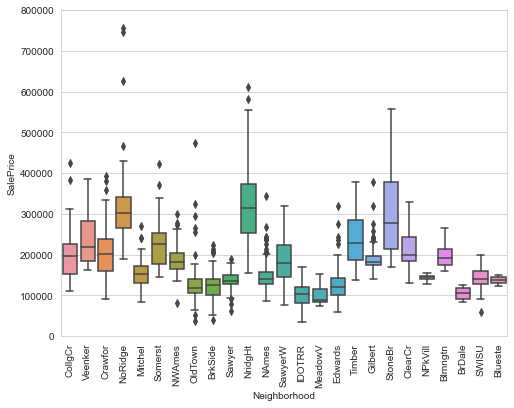

In [43]:
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

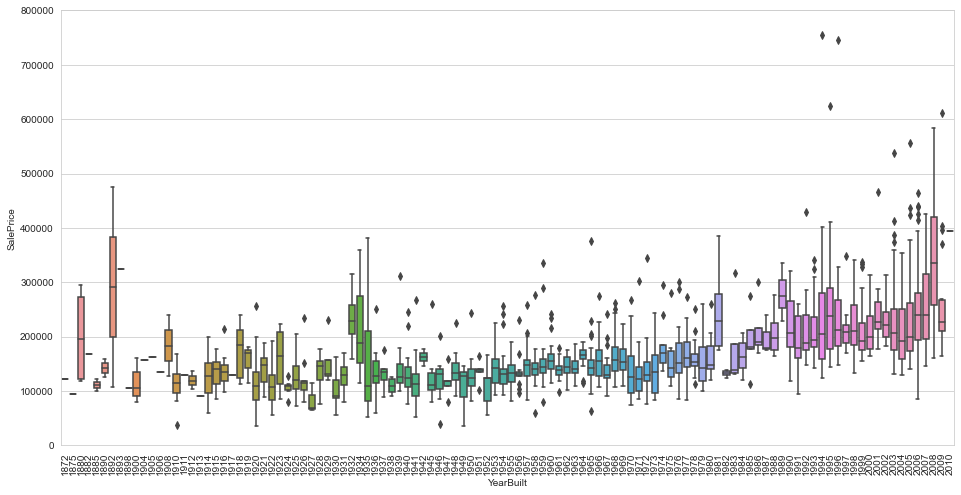

In [40]:
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

#### Multivariate - explore with corr matrix

<AxesSubplot:>

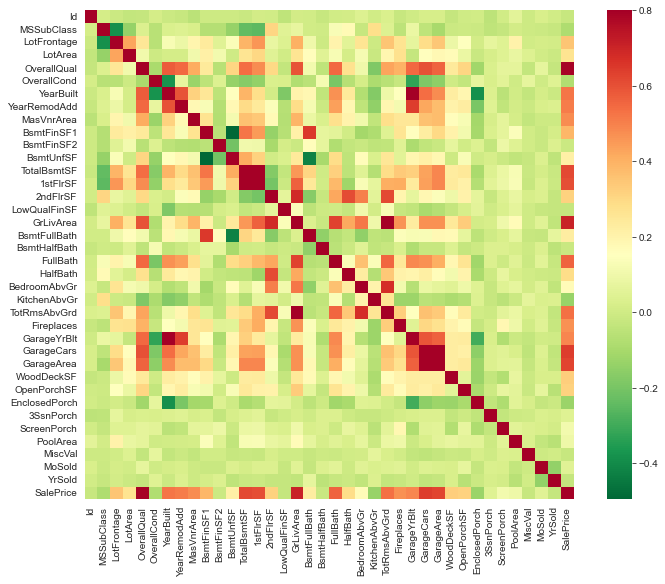

In [15]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

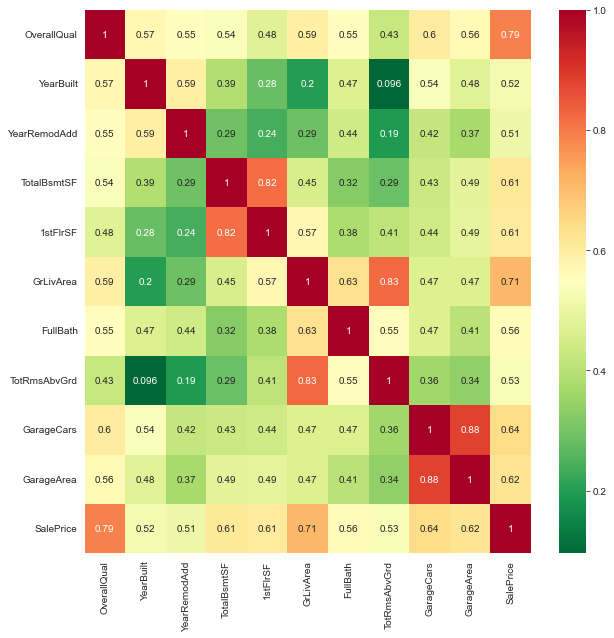

In [16]:
# most correlated features with SalePrice - above 0.5
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

 * from here choose variables that are most correlated with sale price to include in the model
 * also choose only one variable between two - if they are highly correlated with one another and similarly correlated with the target variable

### Outliers
* observation that appears far away and diverges from an overall pattern in a sample
* can be univariate or multivariate

* how they occur:
    * data entry errors - mistakes in filling in entries 
    * measurement errors - faulty devices
    * experimental errors - mistake on experimenting
    * intentional errors - someone lying e.g.
    * sampling errors - sample is too small, 
    * natural outliers - real value but an outlier 

* how they affect data
    * increase variance, reduce statstical power - increases standard deviation or error 
    * bias or influence estimates - drives up the mean
    * affect assumptions of a regression or statistical model

* detecting outliers
    * stats
        * -/+ 1.5 * IQR
        * in the 5th or 95th percentile
        * 3 or more SD away from the mean
        * some issues: fit data on to known distributions, mean/SD/IQR are all affected by outliers
    * distance based
        * judge a point based on distance from its neighbours
        * far from neighbours - less dense neighbourhood
        * k-nearest neighbours - which computes distances between observations and compares
        * if distance of neearest neighbour x is way higher than k nearest neighbour = outlier
    * density based
        * density around normal data is similar to density around its neighbours
        * local outlier factor (LOF) can detect
    * visualization 
        * boxplot, histograms, scatter plot

* Check data above to see examples of outliers, and below

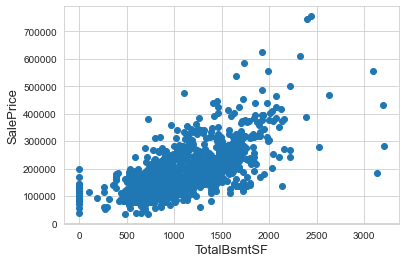

In [17]:
# removes previous outlier (see above)

df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

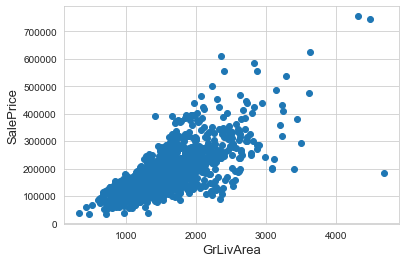

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [19]:
# outlier with large area, but very low sale price - example of multivariate outlier
# not an outlier based on GrLivArea alone - but w/ saleprice it is it 

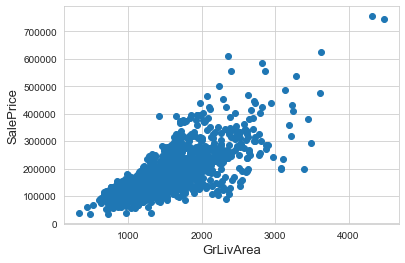

In [42]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


#### Null Value Replacement
1. delete rows 
    * if there's enough data and can afford it
    * loss of information, bad if missing is 30% of your data

2. Replace with mean/median/mode
    * for numerica data 
    * data['col'].replace(np.NaN, data['col'].mean())
    * .median() or .mode()
    * good when data size is small 
    * prevent data loss, could add variance

3. Unique category 
    * assign U for unknown, adds more info to the data set 
    * uses it as a variable
    * Pro: negates loss, less probabilities with on extra category - low variance
    * Con: less variance, adds another feature to the model - may make it worse

4. Predict missing values
    * maybe using a linear regression to replace the nulls 
    * pros: imputing missing variable is an improvement, unbiased estimates
    * cons: bias if incomplete set is used, just a proxy not 'true' values

5. algorithms like KNN or random forest 
    * similar to 4
    * works well on non-linear and categorical data 
    * pro: no predictive model like in 4, correlation w/ data is neglected
    * con: time consuming, distance functions are not always robust 

In [21]:
df_train = pd.read_csv('house_prices/train.csv')

In [22]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [23]:
# drops the columns with mostly missing data
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [24]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]


LotFrontage     float64
GarageQual       object
Electrical       object
GarageType       object
MasVnrType       object
BsmtExposure     object
GarageYrBlt     float64
GarageCond       object
BsmtQual         object
BsmtCond         object
MasVnrArea      float64
GarageFinish     object
BsmtFinType2     object
BsmtFinType1     object
dtype: object

In [25]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [26]:
# null value replacement
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

#### For object/String variables

In [27]:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [28]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")


In [29]:
# create a new category of 'empty'
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [30]:
# check again if anything is missing. 
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
BedroomAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
HalfBath,0,0.0


#### Value Transformations
* normalize data if it is skewed, can be done with:
    * basic transforms (log, exponential, quadratic)
    * binning
        * useful for decision trees, interpreting regression algorithms
        * turning continuous variable toa categorical variable
        * keep original data 
    * scaling
        * useful for regression algorithms and unsupervised learning
        *  rescaling - add/subtract a constant then mult or divide e.g. changing the units
        * normalizing - 
            * dividing by a norm of the vector, making it a range from 0 to 1 for example. 
            * Another example is age range 0-100 and income ranges from 0-100,000. 
            * Want to scale income down so that it is not being given more weight in a multivariate linear regression
            * useful for not normal distribution
        * standardizing - 
            * subtracting then dividing by a measure e.g. getting a standard normal - subtract mean and divide by standard deviation. 
            * Makes it so ranges are from 0 to 1 rather than 0 to 1000, making the weights seem larger than they are
            * assumes data is normal
            * z-scores ?
    * dummy variables 
        * indicator variable - to reperesent categorical data
        * recoding to 0 and 1, usually dichotomous
        * useful in regression - when one or more indepednent variables are categorical
        * .get_dummies


```python
# Standard Scaler to transorm 0-1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)

#min max scalar - min/max values are standardized across variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

# robus scalar - based on median/quantiles - more robust to outliers
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(data) 
```

In [44]:
df_train = pd.read_csv('house_prices/train.csv')

In [45]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

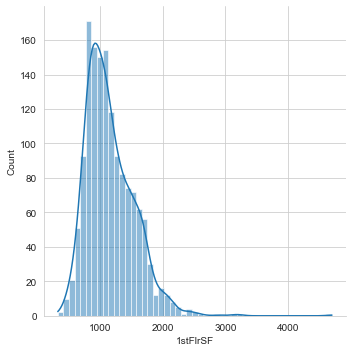

In [51]:
sns.displot(df_train["1stFlrSF"], kde=True)

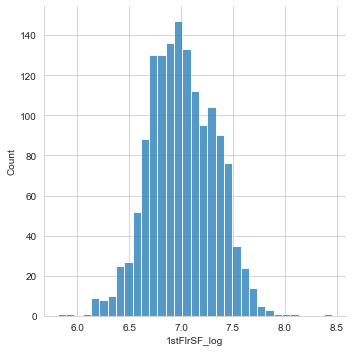

In [53]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.displot(df_train["1stFlrSF_log"])


In [ ]:
# standardscaler - scaling for values to be on the same scale
# needed for: KMeans, PCA, Linear regression 

In [54]:
# Scaling
from sklearn.preprocessing import StandardScaler
# fit transform returns a numpyarray
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))


In [56]:
# everything is converted to a number - need to readd the column names 
print(df_train_scaled.columns)

RangeIndex(start=0, stop=39, step=1)


In [57]:
df_train_scaled.columns = num_feats+["1stFlrSF_log"]

String Variables
- categorical/nominal - usually coded to dummy variables 
- ordinal (grades in school for e.g.)

In [60]:
# get the categorical variables stored to a list, then get dummy vars
# number of dummy variables = k-1. k is the number of categories
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [62]:
# careful with this wouldn't want to do with all variables - creates many columns if you have alot of variables within on
df_dummy.head() 

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


#### Feature Engineering
* better features - means flexible,simpler, better results
* have to select the appropriate features
* model's success based on representation
* attribute (column) could be a feature, but not all features are attributes, some are not useful for the model 
* some have too many dimensions
* e.g decomposing time to part of day e.g. noon/morning 
* e.g. categories - colors to has_color 0/1
* can involve manually making features - aggregating, combining, splitting
* iterative - brainstorm features > devise > select > evaluate
* very similar to data preparation

##### Continuous Numeric Data
[deepdive](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)
* using numpy to convert to binary
```
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched
```
* round percentages and convert to 1-10 score
```
items_popularity['popularity_scale_10'] = np.array(
                   np.round((items_popularity['pop_percent'] * 10)),  
                   dtype='int')
```
* could have interactions
    * creating polynomial features - combining two continuous variables to a certain degree
* binning
    * turning continuous into discrete (cateogries)
    * use pd.cut()
    * useful if you have some extremes, making data skewed
    * adaptive binning - based on data, median split or 4 quantile split
    e.g. ```quantile_list = [0, .25, .5, .75, 1.]
        quantiles = fcc_survey_df['Income'].quantile(quantile_list)```
    * age bins is another example - can be manually binned
        ```
        fcc_survey_df['Age_bin_round'] = np.array(np.floor(
            np.array(fcc_survey_df['Age']) / 10.))
        fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]
        ```
* Statistical Transformation
    * done to stabilize variance - make more normal
    * log transform - use numpy np.log()
    * box-cox transform - positive values, can add a constant to shift it
        * needs review



In [3]:
df_train = pd.read_csv('house_prices/train.csv')

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

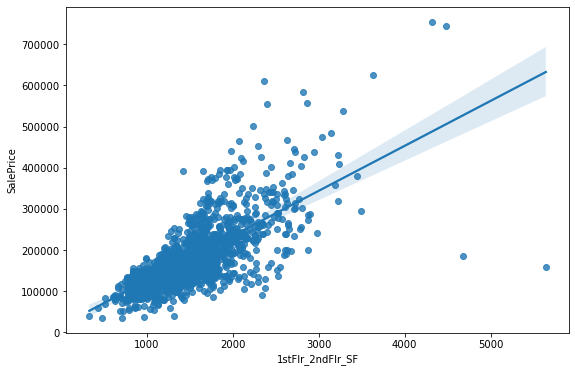

In [4]:
# combining features e.g. total sqrft
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']


f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [5]:
# Simlifying existing features
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [6]:
# binning to simplify, explored data and found no difference in prices between that range
df_train["SimplGarageQual"] = df_train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })


In [9]:
# in the end - can create a data frame that has only numeric variables/features - including dummy variables
# can go back and actually do this

Machine Learning for Feature Engineering
* supervised learning
    * using output of a prediction to predict something else - could introduce errors
    * can predict missing values, or detect outliers 
* unsupervised
    * assigns new categories to new observations - can also be used to detect outliers, and create new features 